<a href="https://colab.research.google.com/github/harshithgowdakc/Sentiment-Analysis/blob/main/Twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [7]:
import nltk
nltk.download('stopwords')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
#let's mount the google drive for import the dtaset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/practice/twitter.csv', encoding='latin1')

In [10]:
# Extract the header
header = df.columns.tolist()

# Create a new row with the header
new_row = pd.DataFrame([header], columns=df.columns)

# Append the new row to the dataset
df = pd.concat([new_row, df], ignore_index=True)

df.columns = ["target","ids","date","flag","user","text"]

In [11]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

def preprocess_tweet_text(tweet):
    # Convert all text to lowercase
    tweet = tweet.lower()

    # Removing any URLs
    tweet = re.sub(r"http\S+|www\S+|https\S+", "", tweet, flags=re.MULTILINE)

    # Removing punctuation
    tweet = tweet.translate(str.maketrans("", "", string.punctuation))

    # Remove user mentions and hashtags from tweet
    tweet = re.sub(r'@\w+|#', '', tweet)

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tweet_tokens = word_tokenize(tweet)
    filtered_words = [word for word in tweet_tokens if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in filtered_words]

    # Lemmatizing
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(word, pos='a') for word in stemmed_words]

    return " ".join(lemma_words)


In [13]:
df['text'] = df['text'].apply(preprocess_tweet_text)

KeyboardInterrupt: ignored

In [12]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot that bummer shoulda got david carr ...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant updat facebook text might cri resul...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan dive mani time ball manag save 50 res...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass behav im mad cant see


In [ ]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
df['polarity'] = df['text'].apply(polarity)

In [ ]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [ ]:
df['sentiment'] = df['polarity'].apply(sentiment)

In [17]:
df.head(2)

,target,ids,date,flag,user,text,polarity,sentiment
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot that bummer shoulda got david carr ...,0.0,Neutral
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant updat facebook text might cri resul...,0.0,Neutral


<Axes: xlabel='sentiment', ylabel='count'>

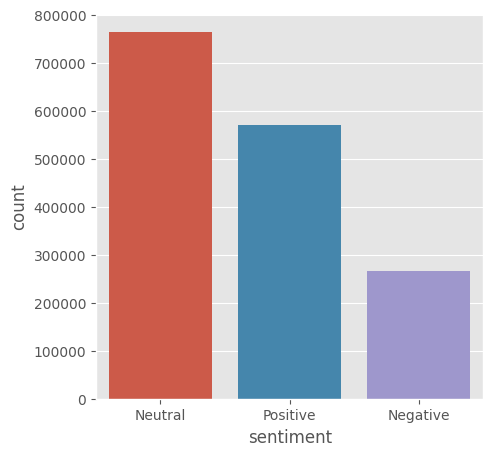

In [18]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = df)

Text(0.5, 1.0, 'Distribution of sentiments')

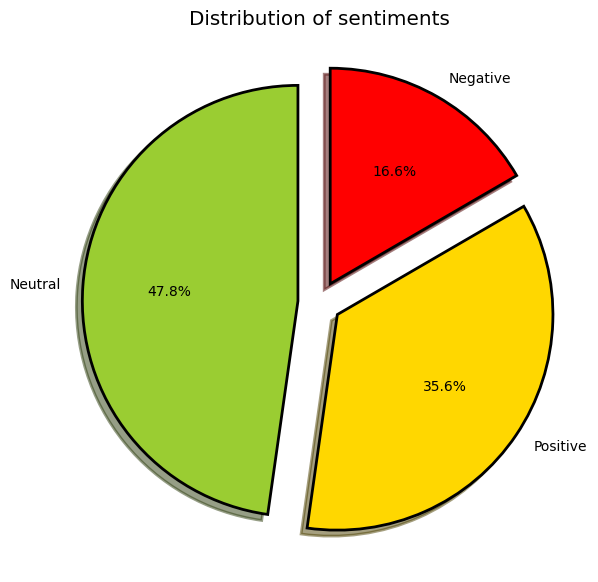

In [19]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [20]:
pos_tweets = df[df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,target,ids,date,flag,user,text,polarity,sentiment
34577,0,1564871781,Mon Apr 20 05:12:25 PDT 2009,NO_QUERY,vjune,miss best friend hurri get home dude,1.0,Positive
1431611,4,2060118783,Sat Jun 06 18:17:39 PDT 2009,NO_QUERY,kv,laurah21 kid lucki learn two best hoki bball p...,1.0,Positive
1546996,4,2182605881,Mon Jun 15 13:23:36 PDT 2009,NO_QUERY,SurfGirl718,point twitter anyway well tell im marri best f...,1.0,Positive
1245637,4,1995126997,Mon Jun 01 12:59:40 PDT 2009,NO_QUERY,xXAnBuShinobiXx,ye got best friend job godbless journey welcom...,1.0,Positive
635927,0,2233770729,Thu Jun 18 21:52:25 PDT 2009,NO_QUERY,KacieThomas,inaperfectworld could call whomev whatev whene...,1.0,Positive


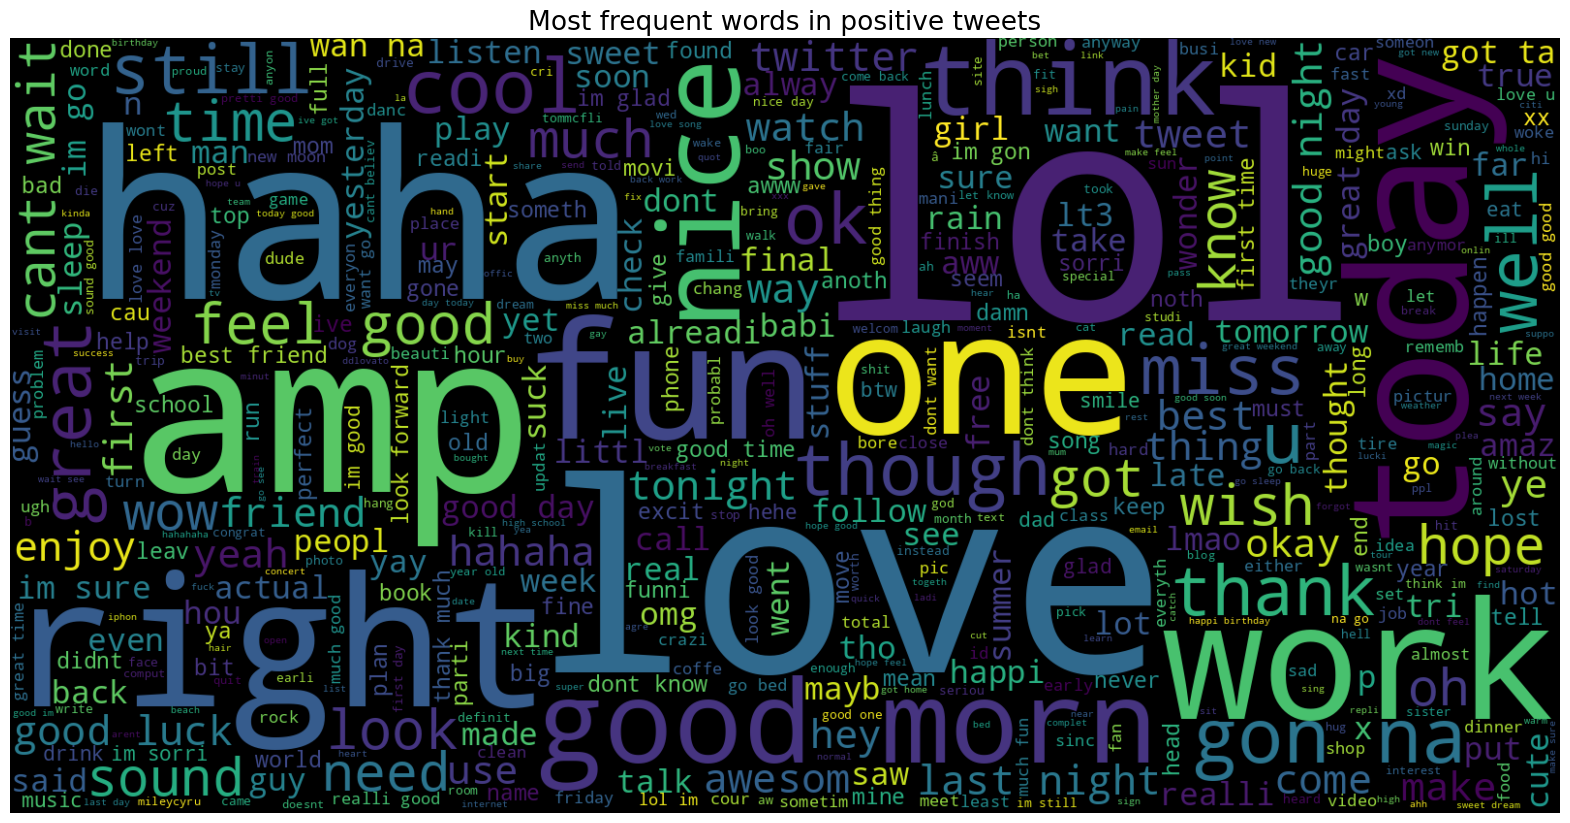

In [21]:
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [22]:
neg_tweets = df[df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,target,ids,date,flag,user,text,polarity,sentiment
593817,0,2218336942,Wed Jun 17 22:17:53 PDT 2009,NO_QUERY,Scottsville4,late tire open tomorrow postpon true blood til...,-3.469447e-18,Negative
53866,0,1680802864,Sat May 02 12:31:52 PDT 2009,NO_QUERY,EternalAegis,oh shit rememb boss fight first playthrough to...,-4.625929e-18,Negative
516156,0,2191001164,Tue Jun 16 04:16:54 PDT 2009,NO_QUERY,laryissa,raspberryhatt yeah hate peopl like actual horr...,-4.625929e-18,Negative
101788,0,1794621193,Thu May 14 06:12:54 PDT 2009,NO_QUERY,maritxp,love hate fact bodi long need alarm clock wake...,-5.551115e-18,Negative
528825,0,2195228632,Tue Jun 16 10:51:05 PDT 2009,NO_QUERY,upperroomuth,sorri late updat last week blue team advanc fi...,-6.938894e-18,Negative


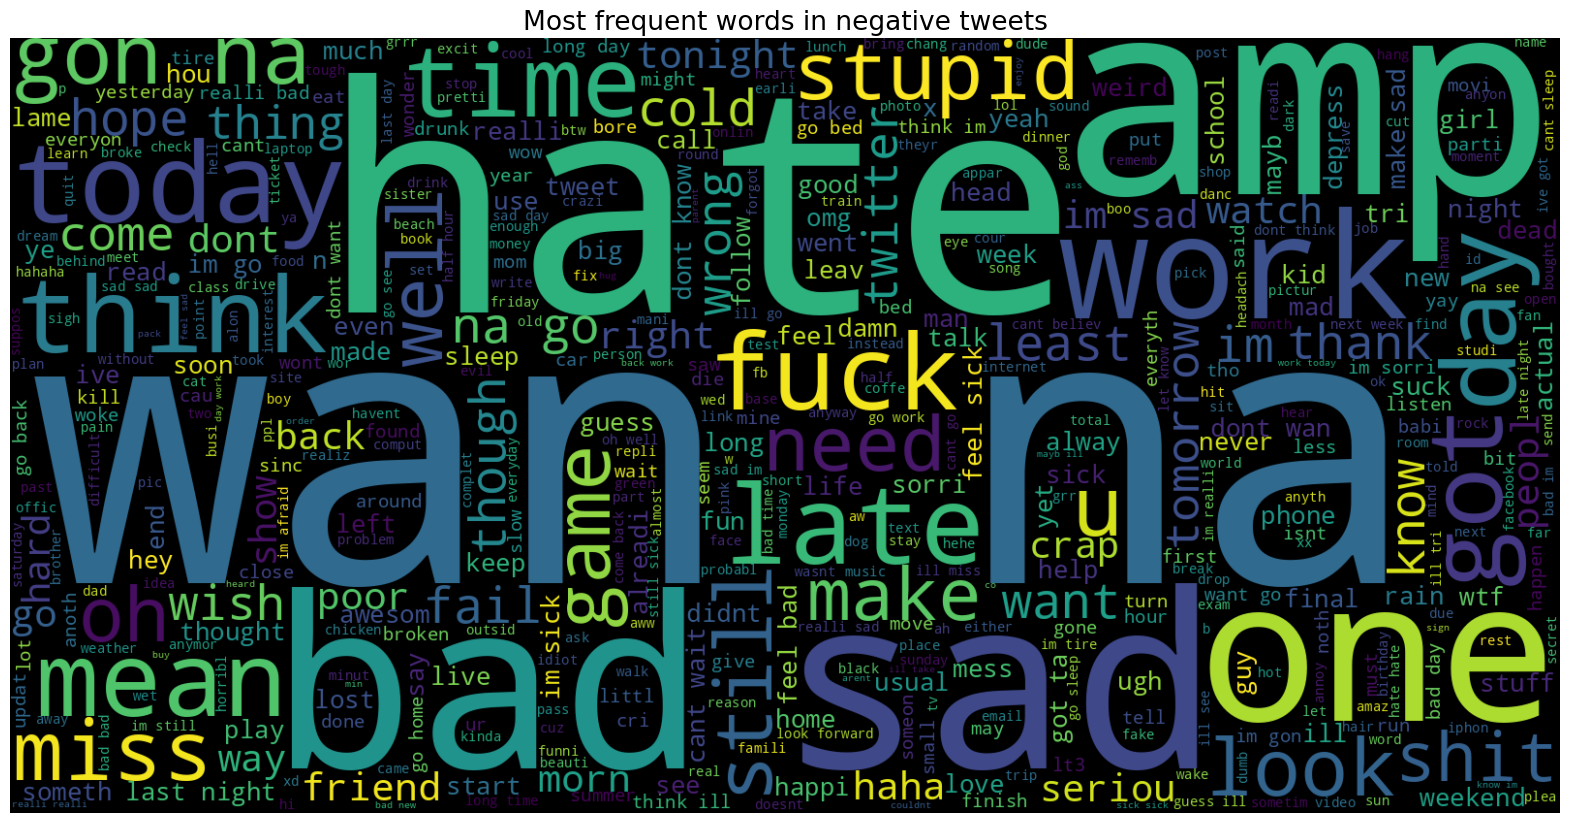

In [23]:
text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [24]:
neutral_tweets = df[df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,target,ids,date,flag,user,text,polarity,sentiment
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot that bummer shoulda got david carr ...,0.0,Neutral
1047100,4,1957731012,Fri May 29 01:25:47 PDT 2009,NO_QUERY,retrocrushx,go dentist soon got ta get readi byee,0.0,Neutral
1047084,4,1957730392,Fri May 29 01:25:38 PDT 2009,NO_QUERY,vanxiaoyi,xiaoyilici,0.0,Neutral
1047085,4,1957730412,Fri May 29 01:25:39 PDT 2009,NO_QUERY,aLmahh,twit twit twit time crean room till drug set c...,0.0,Neutral
1047086,4,1957730496,Fri May 29 01:25:40 PDT 2009,NO_QUERY,mosterman,lauragrac could delet 32 peopl your follow mak...,0.0,Neutral


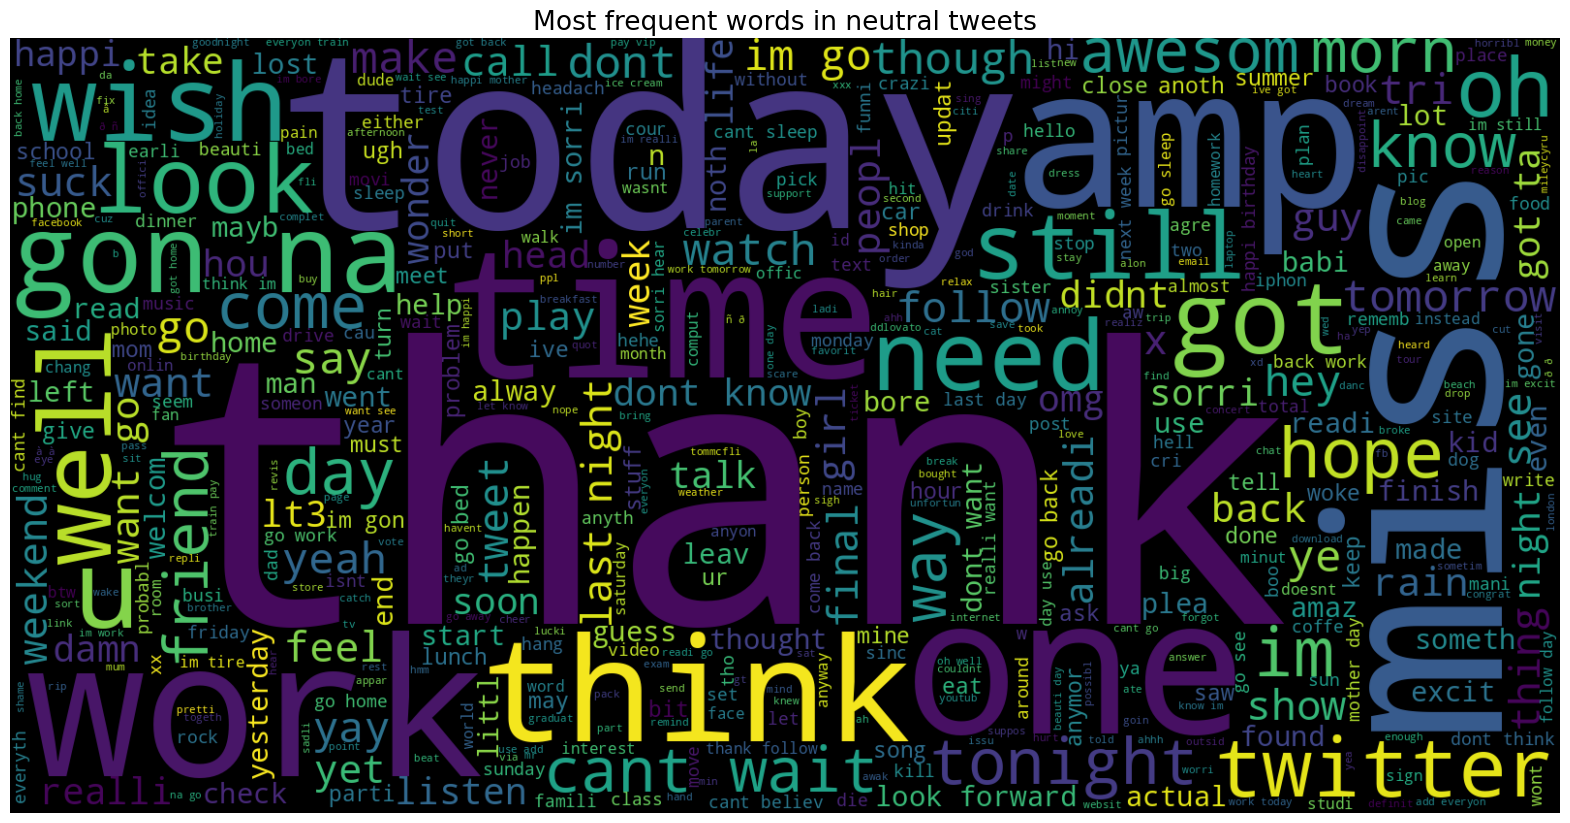

In [25]:
text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [ ]:
vect = CountVectorizer(ngram_range=(1,2)).fit(df['text'])

In [ ]:
X = df['text']
Y = df['sentiment']
X = vect.transform(X)

In [ ]:
df['text'].dtype

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [30]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (1280000, 5203432)
Size of y_train: (1280000,)
Size of x_test: (320000, 5203432)
Size of y_test: (320000,)


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
666 = hsgsfd

In [33]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 99.37%


In [34]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 52610    204    507]
 [   381 152015    358]
 [   474     96 113355]]


              precision    recall  f1-score   support

    Negative       0.98      0.99      0.99     53321
     Neutral       1.00      1.00      1.00    152754
    Positive       0.99      0.99      0.99    113925

    accuracy                           0.99    320000
   macro avg       0.99      0.99      0.99    320000
weighted avg       0.99      0.99      0.99    320000



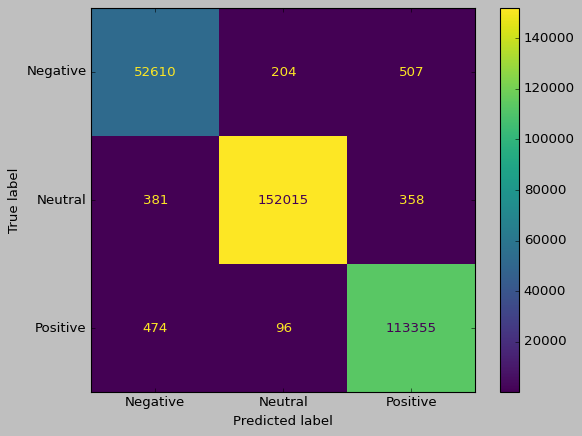

In [35]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [36]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

In [ ]:
print("Best parameters:", grid.best_params_)

In [ ]:
y_pred = grid.predict(x_test)

In [ ]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

In [ ]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

In [ ]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

In [ ]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

In [ ]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

In [ ]:
print("Best parameter:", grid.best_params_)

In [ ]:
y_pred = grid.predict(x_test)

In [ ]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

In [ ]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Create an instance of LogisticRegression
logreg = LogisticRegression()

# Fit the logistic regression model
logreg.fit(x_train, y_train)

# Predict on the test data
logreg_pred = logreg.predict(x_test)

# Calculate accuracy
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))
